In [8]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD
# Neural networks.
import tensorflow.keras as kr
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
# print(os.listdir("../input"))

In [9]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]
df = pd.read_csv('powerproduction.csv')

X=df[['speed']]
y=df[['power']]


In [10]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [11]:

model.fit(df['speed'],df['power'], epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 1s 1ms/step - loss: 3763.9403
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 3674.7572
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 3721.0779
Epoch 4/500
50/50 [==============================] - 0s 1ms/step - loss: 3450.5219
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 3044.5308
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 2767.7912
Epoch 7/500
50/50 [==============================] - 0s 1ms/step - loss: 2912.1388
Epoch 8/500
50/50 [==============================] - 0s 1ms/step - loss: 2616.4489
Epoch 9/500
50/50 [==============================] - 0s 1ms/step - loss: 2535.9936
Epoch 10/500
50/50 [==============================] - 0s 2ms/step - loss: 2251.4297
Epoch 11/500
50/50 [==============================] - 0s 1ms/step - loss: 2293.0206
Epoch 12/500
50/50 [==============================] - 0s 2ms/step - loss: 2171.8450
E

50/50 [==============================] - 0s 2ms/step - loss: 258.3514
Epoch 99/500
50/50 [==============================] - 0s 1ms/step - loss: 283.1452
Epoch 100/500
50/50 [==============================] - 0s 1ms/step - loss: 414.1516
Epoch 101/500
50/50 [==============================] - 0s 1ms/step - loss: 328.9811
Epoch 102/500
50/50 [==============================] - 0s 1ms/step - loss: 304.4251
Epoch 103/500
50/50 [==============================] - 0s 1ms/step - loss: 242.5836
Epoch 104/500
50/50 [==============================] - 0s 1ms/step - loss: 304.1032
Epoch 105/500
50/50 [==============================] - 0s 1ms/step - loss: 281.1119
Epoch 106/500
50/50 [==============================] - 0s 1ms/step - loss: 376.7159
Epoch 107/500
50/50 [==============================] - 0s 1ms/step - loss: 379.8862
Epoch 108/500
50/50 [==============================] - 0s 1ms/step - loss: 261.5707
Epoch 109/500
50/50 [==============================] - 0s 1ms/step - loss: 340.2770
Epoch 1

50/50 [==============================] - 0s 1ms/step - loss: 258.9246
Epoch 196/500
50/50 [==============================] - 0s 1ms/step - loss: 354.5386
Epoch 197/500
50/50 [==============================] - 0s 1ms/step - loss: 381.7117
Epoch 198/500
50/50 [==============================] - 0s 1ms/step - loss: 270.4429
Epoch 199/500
50/50 [==============================] - 0s 1ms/step - loss: 348.3597
Epoch 200/500
50/50 [==============================] - 0s 1ms/step - loss: 348.4004
Epoch 201/500
50/50 [==============================] - 0s 1ms/step - loss: 210.6448
Epoch 202/500
50/50 [==============================] - 0s 1ms/step - loss: 204.9914
Epoch 203/500
50/50 [==============================] - 0s 1ms/step - loss: 334.2132
Epoch 204/500
50/50 [==============================] - 0s 1ms/step - loss: 371.0450
Epoch 205/500
50/50 [==============================] - 0s 1ms/step - loss: 347.4118
Epoch 206/500
50/50 [==============================] - 0s 1ms/step - loss: 330.9823
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 257.7190
Epoch 293/500
50/50 [==============================] - 0s 1000us/step - loss: 325.9777
Epoch 294/500
50/50 [==============================] - 0s 1ms/step - loss: 235.1239
Epoch 295/500
50/50 [==============================] - 0s 2ms/step - loss: 313.0623
Epoch 296/500
50/50 [==============================] - 0s 1ms/step - loss: 201.7265
Epoch 297/500
50/50 [==============================] - 0s 1ms/step - loss: 216.7631
Epoch 298/500
50/50 [==============================] - 0s 1ms/step - loss: 263.9461
Epoch 299/500
50/50 [==============================] - 0s 1ms/step - loss: 294.6841
Epoch 300/500
50/50 [==============================] - 0s 1ms/step - loss: 275.8877
Epoch 301/500
50/50 [==============================] - 0s 2ms/step - loss: 241.0419
Epoch 302/500
50/50 [==============================] - 0s 1ms/step - loss: 223.9503
Epoch 303/500
50/50 [==============================] - 0s 2ms/step - loss: 167.8859
Epo

50/50 [==============================] - 0s 2ms/step - loss: 246.7544
Epoch 390/500
50/50 [==============================] - 0s 2ms/step - loss: 209.1619
Epoch 391/500
50/50 [==============================] - 0s 1ms/step - loss: 216.1428
Epoch 392/500
50/50 [==============================] - 0s 1ms/step - loss: 249.5094
Epoch 393/500
50/50 [==============================] - 0s 1ms/step - loss: 264.0249
Epoch 394/500
50/50 [==============================] - 0s 1ms/step - loss: 323.3404
Epoch 395/500
50/50 [==============================] - 0s 1ms/step - loss: 210.7525
Epoch 396/500
50/50 [==============================] - 0s 2ms/step - loss: 172.4145
Epoch 397/500
50/50 [==============================] - 0s 1ms/step - loss: 166.2760
Epoch 398/500
50/50 [==============================] - 0s 1ms/step - loss: 252.0784
Epoch 399/500
50/50 [==============================] - 0s 1ms/step - loss: 222.0238
Epoch 400/500
50/50 [==============================] - 0s 1ms/step - loss: 349.5222
Epoch 

50/50 [==============================] - 0s 1000us/step - loss: 164.5421
Epoch 487/500
50/50 [==============================] - 0s 1ms/step - loss: 284.4456
Epoch 488/500
50/50 [==============================] - 0s 1ms/step - loss: 308.9229
Epoch 489/500
50/50 [==============================] - 0s 2ms/step - loss: 184.4733
Epoch 490/500
50/50 [==============================] - 0s 1ms/step - loss: 196.3463
Epoch 491/500
50/50 [==============================] - 0s 1ms/step - loss: 154.2020
Epoch 492/500
50/50 [==============================] - 0s 1ms/step - loss: 270.1280
Epoch 493/500
50/50 [==============================] - 0s 1ms/step - loss: 299.5184
Epoch 494/500
50/50 [==============================] - 0s 2ms/step - loss: 272.7118
Epoch 495/500
50/50 [==============================] - 0s 1ms/step - loss: 218.4153
Epoch 496/500
50/50 [==============================] - 0s 1ms/step - loss: 283.4445
Epoch 497/500
50/50 [==============================] - 0s 1ms/step - loss: 236.3584
Epo

In [12]:
y_pred= model.predict(df['speed'])

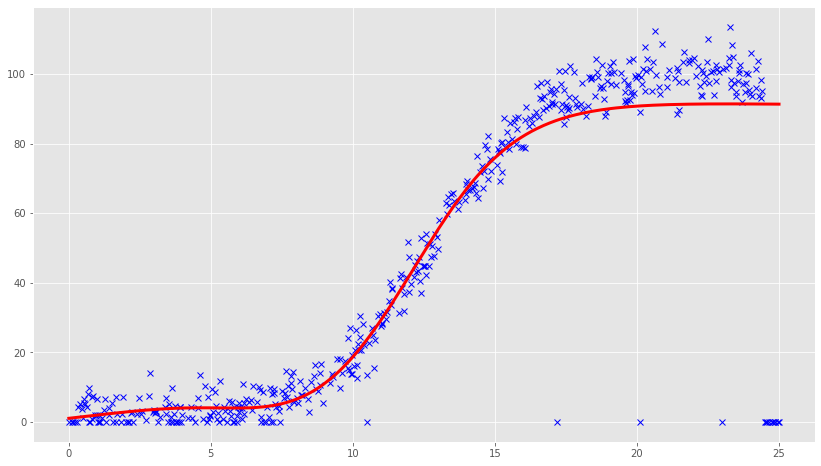

In [13]:
plt.plot(df['speed'], df['power'],'x',color='blue', label='actual')
plt.plot(df['speed'], model.predict(df['speed']), color='red', linewidth=3, label='prediction')

In [14]:
# Take four hand-picked values and see their predictions.
model.predict([1.0,2.0,10.0,25.0])

array([[ 2.008785 ],
       [ 2.8856936],
       [18.722795 ],
       [91.30422  ]], dtype=float32)

In [15]:
model.save('model.h5')